In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt

### Probability density functions

The probability denisty function for a (continuous) random variable is a function whose value at a given point, tells us the relative likelihood that the random variable takes that value. Below, is the probability density function for a Gaussian distribution with mean 0 and standard deviation 1, the so called bell curve.

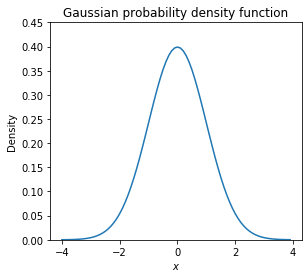

In [46]:
fig, ax = plt.subplots(1,1, figsize=(4.5,4.0))

x = np.arange(-4,4,0.1)
ax.plot(x, stats.norm.pdf(x,0,1))

ax.set_ylim((0,0.45))
ax.set_title('Gaussian probability density function')
ax.set_xlabel('$x$')
ax.set_ylabel('Density');

This function achieves its maximum at $x=0$, the mean, and gets smaller as you move further from this point. In reality, the probability that the random variable takes a particular, exact value is 0. In order to get the probability that the random variable lies in a particular region, we compute the area under the curve in that region. From this, we know that the area under the whole curve must give probabilty 1 as the random variable must take some value!

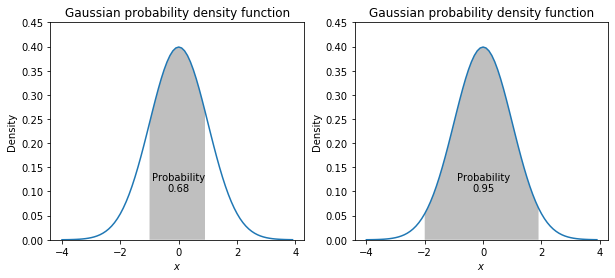

In [44]:
fig, axs = plt.subplots(1,2, figsize=(10.0,4.0))

x = np.arange(-4,4,0.1)
axs[0].plot(x, stats.norm.pdf(x,0,1))

region = np.arange(-1,1,0.1)
axs[0].fill_between(region, stats.norm.pdf(region,0,1), facecolor='black', alpha=0.25)
axs[0].text(0, 0.1, 'Probability\n0.68', ha='center')

axs[0].set_ylim((0,0.45))
axs[0].set_title('Gaussian probability density function')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('Density')

axs[1].plot(x, stats.norm.pdf(x,0,1))

region = np.arange(-2,2,0.1)
axs[1].fill_between(region, stats.norm.pdf(region,0,1), facecolor='black', alpha=0.25)
axs[1].text(0, 0.1, 'Probability\n0.95', ha='center')

axs[1].set_ylim((0,0.45))
axs[1].set_title('Gaussian probability density function')
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('Density');

In this example, the probability that the random variable is between -1 and 1 is 0.68. This is the probability that the random variable is within one standard deviation from the mean; it would also be 0.68 regarding of the mean and standard deviation of the Gaussian distibution. Increase this to two standard deviations, then the probability that the random variable is between -2 and 2 is 0.95. For a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$, we denote the probability denisty function as $f(x; \mu, \sigma^2)$ which has the following equation:
\begin{equation}
    f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp  \left( -\frac{1}{2 \sigma^2} (x - \mu)^2 \right).
\end{equation}

Given the probability density function, you can compute the probability of any event for the random variable by finding the relevant area under the curve. This process can also be reversed. If you know the probabilities of all the events, you can construct the probability density curve.

### Mixture models

Mixture models are a way to construct random variables combining other distributions. Suppose that we have two distributions; the first a Gaussian distribution with mean 0 and standard deviation 1 (probability density function $f(x; 0, 1)$), the second a Gaussian distribution with mean 4 and standard deviation 1 (probability density function $f(x; 4, 1)$). we toss a fair coin and given the outcome we randomly sample a point from either the first or second distribution. This process itself describes a random process so it will have its own probability density function that we will compute now.

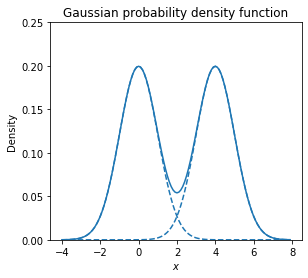

In [55]:
fig, ax = plt.subplots(1,1, figsize=(4.5,4.0))

x = np.arange(-4,8,0.1)
ax.plot(x, 0.5*stats.norm.pdf(x,0,1) + 0.5*stats.norm.pdf(x,4,1))
ax.plot(x, 0.5*stats.norm.pdf(x,0,1), c='tab:blue', ls='--')
ax.plot(x, 0.5*stats.norm.pdf(x,4,1), c='tab:blue', ls='--')

ax.set_ylim((0,0.25))
ax.set_title('Gaussian probability density function')
ax.set_xlabel('$x$')
ax.set_ylabel('Density');

The two dashed curves are the probability density functions $f(x; 0, 1)$ and $f(x; 4, 1)$ each scaled by the 0.5, the probability that the coin selects that random variable. The probability density function of our final random variable is given by the solid line and is the sum of the weighted probability density functions,
\begin{equation}
    f_{\text{Mixture}}(x) = 0.5 f(x; 0, 1) + 0.5 f(x; 4, 1).
\end{equation}

Given an observation, say $x=3.0$, we can ask which of the two distributions the point came from, basically asking was the coin's outcome heads or tails? In this case, it seems much more likely that the observation was drawn from the right distribution than the left, although it's not impossible. We can answer this by seeing how much of the two probablity density functions contribute to the mixture density function;
\begin{equation}
    \text{Probability observation $x$ is from left distribution} = \frac{0.5 f(x; 0, 1)}{0.5 f(x; 0, 1) + 0.5 f(x; 4, 1)},
\end{equation}
and likewise for the other distribution,
\begin{equation}
    \text{Probability observation $x$ is from right distribution} = \frac{0.5 f(x; 4, 1)}{0.5 f(x; 0, 1) + 0.5 f(x; 4, 1)}.
\end{equation}

We construct a function that allow us to answer this question for any number of Gaussian distributions with differing means and standard deviations, and a biased coin to choose between these distributions.

In [82]:
def mixture_probability(x, means, stdevs, pis):
    n = len(means)
    probs = np.zeros(n)
    for i in range(n):
        probs[i] = pis[i]*stats.norm.pdf(x,means[i],stdevs[i])
        
    return probs/np.sum(probs)

In [84]:
x = 3.0
probs = mixture_probability(x, [0,4], [1,1], [0.5,0.5])

print('Probability observation', x, 'is from left distribution: ', np.round(probs[0], 3))
print('Probability observation', x, 'is from right distribution:', np.round(probs[1], 3))

Probability observation 3.0 is from left distribution:  0.018
Probability observation 3.0 is from right distribution: 0.982


From this we see that it is much more likely that the point came from the right distribution.

Let's finish up with a slightly more complicated example. This time we have three Gaussian distributions, the first has mean 3 and standard deviation 0.5, the second mean 0 and standard deviation 1.0, and the third mean 4 and standard deviation 1.5. This time we will assume that the coin randomly chooses between these distributions with probablity given by $\pi = (0.5,0.3,0.2)$.

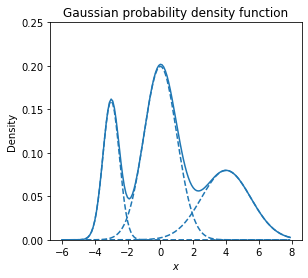

In [80]:
fig, ax = plt.subplots(1,1, figsize=(4.5,4.0))

x = np.arange(-6,8,0.1)
ax.plot(x, 0.5*stats.norm.pdf(x,0,1) + 0.3*stats.norm.pdf(x,4,1.5) + 0.2*stats.norm.pdf(x,-3,0.5))
ax.plot(x, 0.2*stats.norm.pdf(x,-3,0.5), c='tab:blue', ls='--')
ax.plot(x, 0.5*stats.norm.pdf(x,0,1), c='tab:blue', ls='--')
ax.plot(x, 0.3*stats.norm.pdf(x,4,1.5), c='tab:blue', ls='--')

ax.set_ylim((0,0.25))
ax.set_title('Gaussian probability density function')
ax.set_xlabel('$x$')
ax.set_ylabel('Density');

Like before we can ask what the probability a particular observation comes from each of the distributions using the same formula, this time using the different standard deviations and coin probabilities.

In [90]:
x = -2.0
probs = mixture_probability(x, [-3,0,4], [0.5,1,1.5], [0.5,0.3,0.2])

print('Probability observation', x, 'is from left distribution  :', np.round(probs[0], 3))
print('Probability observation', x, 'is from middle distribution:', np.round(probs[1], 3))
print('Probability observation', x, 'is from right distribution :', np.round(probs[2], 3))

Probability observation -2.0 is from left distribution  : 0.769
Probability observation -2.0 is from middle distribution: 0.231
Probability observation -2.0 is from right distribution : 0.0
